<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 1 - Monte Carlo</h1>

In questo notebook sono riportati gli esercizi per la cui soluzione è necessario il codice **mc.1**: i grafici qui presenti sono in python, ma nella cartella è possibile trovarne di analoghi fatti con gnuplot. Sono anche riportati i comandi per creare i plot, salvati in dei file '.gnuplot'. 

Per eseguire il notebook sui computer di laboratorio, è necessario lanciare il seguente comando e selezionare un kernel python.

<center>

`module load python3/anaconda`
</center>

Tale comando deve essere lanciato prima dell'apertura del notebook.

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from scipy.stats import norm

<center>

## Metodi Monte-Carlo

I metodi Monte Carlo sono una famiglia di algoritmi numerici che consentono la generazione di ensamble statistici corretti. Le tecniche Monte Carlo sono incentrate sullo studio delle configurazioni del sistema in analisi, con l'obiettivo di produrre un set di configurazioni che seguano la distribuzione di Boltzmann; questo può essere fatto per mezzo di una catena di Markov. Il vantaggio di generare delle configurazioni secondo Boltzmann è che le medie termiche, definite come

$$
\left<O\right>\,=\,\frac{1}{Z}\sum_{\left\{r_i\right\}}O\left(\left\{r_i\right\}\right)\exp{\left[-\beta U\left(\left\{r_i\right\}\right)\right]}
$$

possono essere esplicitate come una semplice somma algebrica dei valori assunti dall'osservabile di nostro interesse sui vari costituenti del set.


### Algoritmo di Metropolis


L'algoritmo di Metropolis è un metodo Monte Carlo che consente di generare valori che presentino una distribuzione di probabilità fissata a priori. Dal punto di vista operativo, il procedimento è il seguente:

1. Scegliere una configurazione iniziale, che non è importante ai fini simulativi in quanto le proprietà che otterremo all'equilibrio sono indipendenti dalle condizioni iniziali.

2. Tentare una mossa casuale (che sia fra quelle possibili per il sistema che stiamo considerando).

3. Calcolare la differenza in energia fra le due configurazioni che abbiamo a questo punto, ossia quella prima dell'applicazione della mossa randomica e quella dopo l'attuazione della stessa. L'accettazione della mossa avviene con probabilità

$$
p\left(x|y\right)\,=\,\text{min}\left[1,\,e^{-\Delta E/k_BT}\right]
$$

Per generare una catena di Markov, il secondo ed il terzo passaggio devono essere ripetuti fino al raggiungimento di un numero statisticamente significativo di configurazioni generate.

<center>
<h1 style="color:blue; font-size:55px;"> Esercizio 3.2</h1>

Nel caso dell'implementazione dell'algoritmo di Metropolis presente nel codice **mc.1**, la nuova configurazione della catena viene prodotta per mezzo di perturbazioni casuali alle velocità ed alle posizioni delle masse. Il limite superiore a tali perturbazioni è fornito per mezzo di un fattore di proporzionalità $\gamma$, dato che

$$
x_{max}\,=\,\gamma \sqrt{\frac{2k_BT_{in}}{k}}, 
$$

$$
v_{max}\,=\,\gamma \sqrt{\frac{k_BT_{in}}{m}},
$$

dove $k$ è la costante elastica delle molle che collegano le masse $m$. E' importante che la scelta del valore di gamma sia adeguata al sistema che stiamo prendendo in considerazione. Sebbene tale parametro possa essere scelto in modo arbitrario, si ha che che

- $\mathbf{\gamma}$ **troppo grande**, l'accettazione di una singola mossa richiederebbe un numero molto elevato di tentativi.

- $\mathbf{\gamma}$ **troppo piccolo** non consentirebbe di esplorare efficacemente le possibili configurazioni, perchè le singole mosse, sebbene accettate con rates molto elevati, non comporterebbero dei cambiamenti significativi alle condizioni di partenza

### Ottimizzazione su gamma

Per questo motivo vogliamo determinare quale sia il parametro $\gamma$ ottimale per far sì che il sistema giunga a termalizzazione il più in fretta possibile, ossia con il minor numero di mosse tentate. Per questa ottimizzazione ho preso in considerazione

$$
\gamma \in \left\{0.05,\,0.075,\,0.1,\,0.125,\,0.15,\,0.175,\,0.2,\,0.225,\,0.25,\,0.275,\,0.3\right\}
$$

Dato che il metodo Metropolis utilizzato in **mc.1** fa uso di un generatore di numeri pseudo-casuali, la cui sequenza è determinata nel momento in cui viene fissato il seed, è innanzitutto necessario modificare il codice a disposizione per far sì che sia possibile specificare il seed nel file _parameters.1_. Nel grafico sottostante risulta evidente come per tre valori differenti del seed il numero di mosse tentate per giungere a termalizzazione vari sensibilmente per ogni valore di gamma considerato.

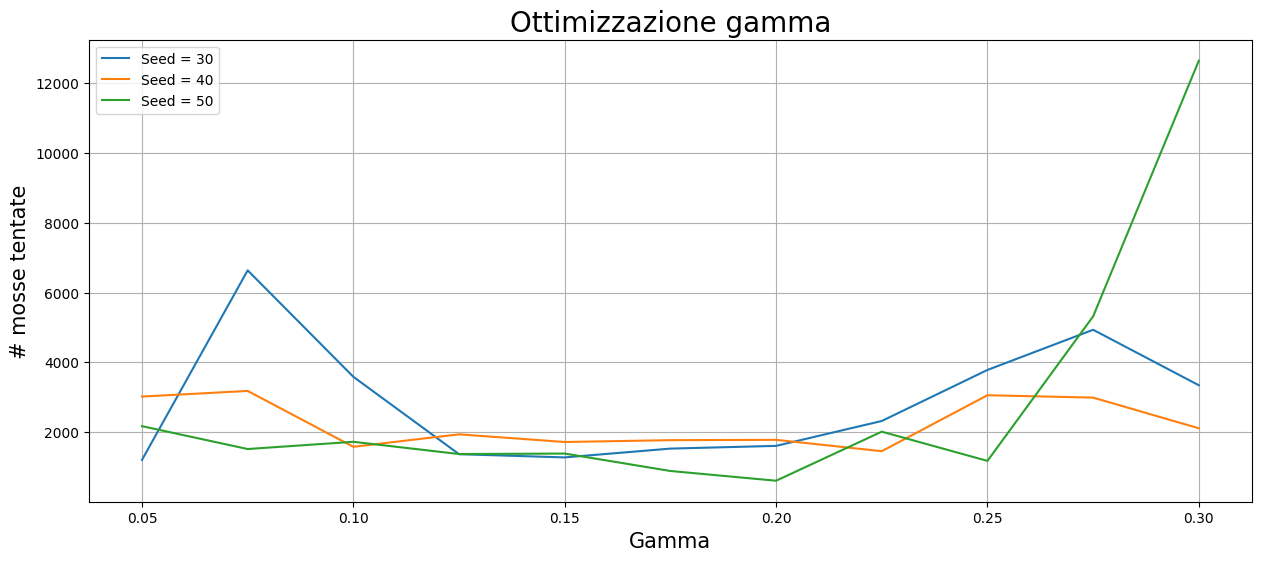

In [6]:
fig = plt.figure(figsize=(15, 6))
n_moves = np.loadtxt('confrontoGamma/results.dat')

gamma = np.array([0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3])


plt.plot(gamma, n_moves[0, :], label = 'Seed = 30')
plt.plot(gamma, n_moves[1, :], label = 'Seed = 40')
plt.plot(gamma, n_moves[2, :], label = 'Seed = 50')
    

plt.ylabel(r"# mosse tentate", fontsize = 15)
plt.xlabel(r"Gamma", fontsize = 15)
plt.title(r"Ottimizzazione gamma", fontsize = 20)
plt.legend(loc = 'best')
plt.grid(True)

plt.show()

Per ottenere un andamento che fosse indipendete dal seed, ho scritto uno script (vedi *ott_gamma.sh*) che consente di effettuare l'analisi precedente per un numero di volte segnalato dall'utente e con seed che si aggiorna ad ogni iterazione come

$$
\text{seed}\,=\,20\,+\,10 \cdot i,
$$

dove l'indice $i$ si riferisce all'iterazione attuale. Ho eseguito l'ottimizzazione con 1000 seed differenti, stampando nel file 'confrontoGamma/results.dat' i risultati. Ogni colonna è relativa ad un valore diverso di gamma, mentre ogni riga è stata ottenuta con un seed differente. I singoli andamenti sono riportati nel grafico seguente.

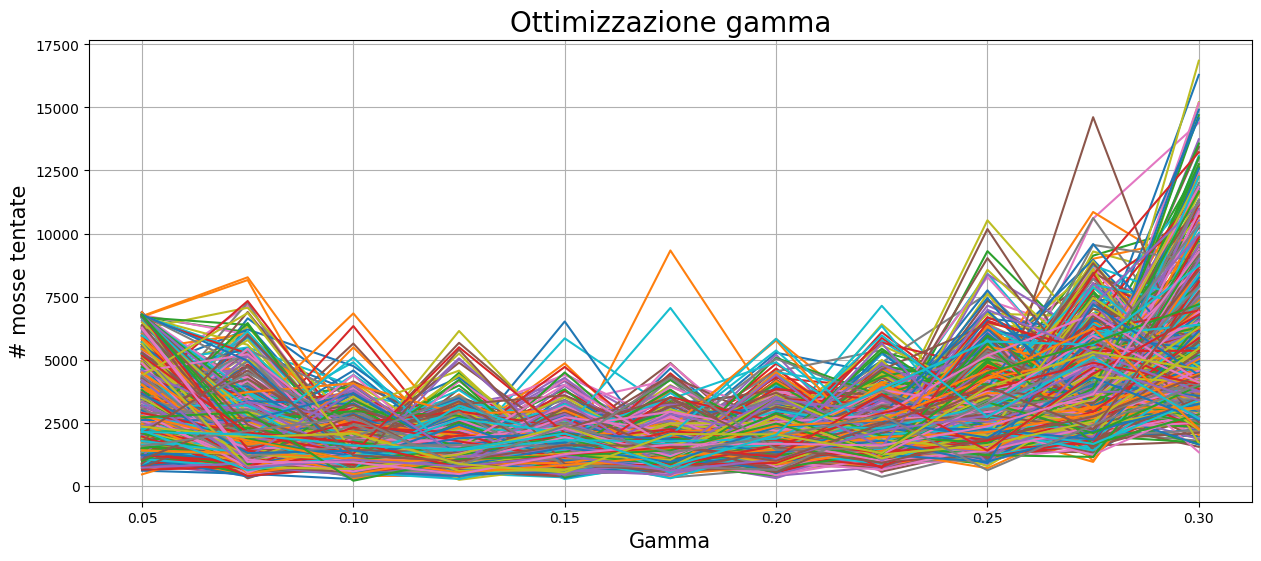

In [7]:
fig = plt.figure(figsize=(15, 6))
n_moves = np.loadtxt('confrontoGamma/results.dat')

gamma = np.array([0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3])

for i in range(0, len(n_moves[:, 0])):
    plt.plot(gamma, n_moves[i, :])
    

plt.ylabel(r"# mosse tentate", fontsize = 15)
plt.xlabel(r"Gamma", fontsize = 15)
plt.title(r"Ottimizzazione gamma", fontsize = 20)
plt.grid(True)

plt.show()

Per ottenere l'andamento vero, basta mediare fra loro i valori relativi allo stesso gamma. Si può apprezzare nel grafico seguente come il valore minimo (e quindi la termalizzazione più rapida) si abbia in corrispondenza di 

$$
    \gamma_{min}\,=\,0.15
$$

Le simulazioni successive saranno performate con questo valore del parametro.

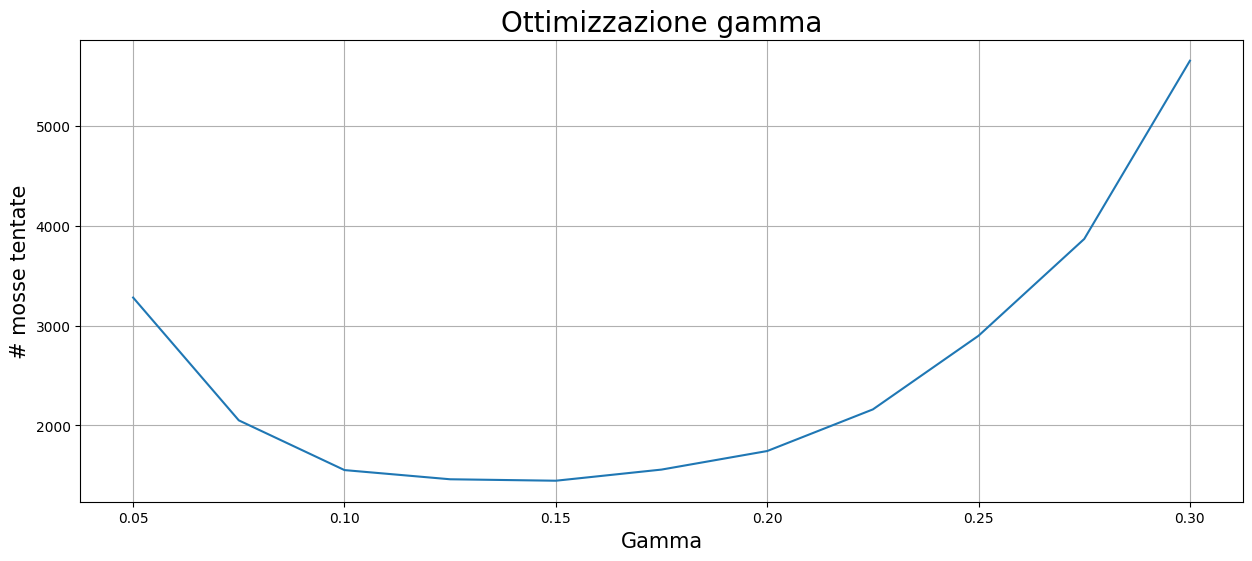

In [8]:
fig = plt.figure(figsize=(15, 6))
n_moves = np.loadtxt('confrontoGamma/results.dat')

gamma = np.array([0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3])
ott_gamma = np.zeros(len(gamma))

for i in range(0, len(gamma)):
    ott_gamma[i] = np.mean(n_moves[:, i])

plt.plot(gamma, ott_gamma)

plt.ylabel(r"# mosse tentate", fontsize = 15)
plt.xlabel(r"Gamma", fontsize = 15)
plt.title(r"Ottimizzazione gamma", fontsize = 20)
plt.grid(True)

plt.show()

<center>
<h1 style="color:blue; font-size:55px;"> Esercizio 3.3</h1>

Vogliamo ora confrontare i risultati ottenuti con i due approcci fino ad ora studiati, ossia Molecular Dynamics e Monte Carlo, per una simulazione di una catena di 60 masse collegate fra loro da delle molle e con interazioni di Lennard-Jones aggiuntive alla temperatura di 300 K. 

Per valutare la compatibilità di quanto ottenuto, effettuiamo ora un confronto fra le energie libere che possono essere ricavate dalle due simulazioni, che si calcolano a partire dalle probabilità ottenute mediante il binning sui parametri d'ordine. In primo luogo riportiamo la $\rho\left(R_g,\,q\right)$ ottenuta con la simulazione Monte-Carlo.

In [13]:
T = 300
kB = 0.0862

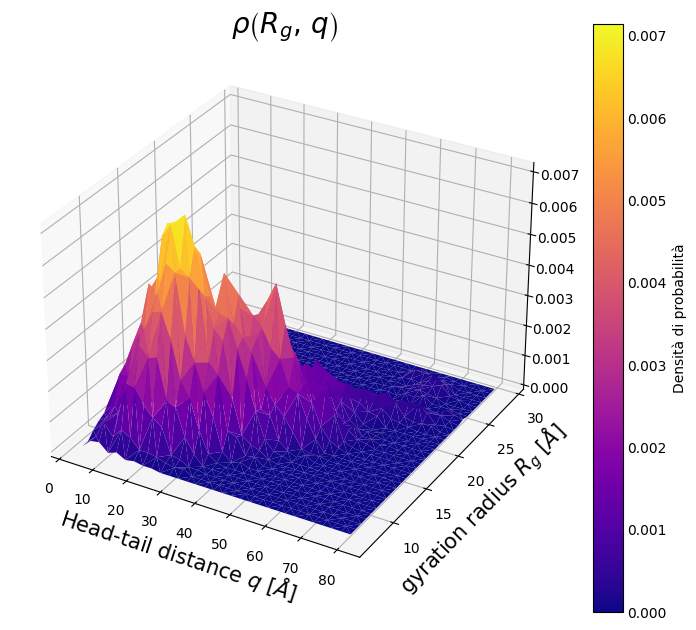

In [10]:
plt.style.use('_mpl-gallery')

data = np.loadtxt('confrontoMC_MD/2DbinningMC.dat') 
x, y, z = data[:, 0], data[:, 1], data[:, 2]

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize = (7, 6))
ax.plot_trisurf(x, y, z, cmap='plasma')

ax.set_xlabel(r'Head-tail distance $q$ [$\AA$]', fontsize = 15)
ax.set_ylabel(r'gyration radius $R_g$ [$\AA$]', fontsize = 15)
ax.set_title(r"$\rho\left(R_g,\,q\right)$", fontsize = 20)

sm = ScalarMappable(cmap='plasma')
sm.set_array(z)
plt.colorbar(sm, ax=ax, label='Densità di probabilità')
plt.show()

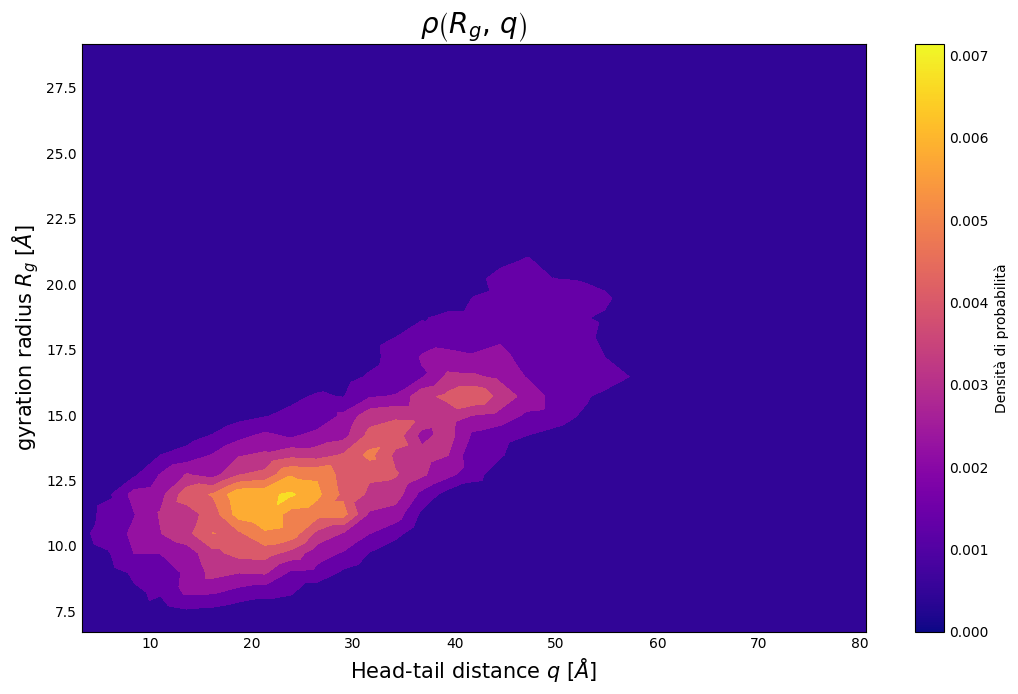

In [17]:
plt.style.use('_mpl-gallery-nogrid')

data = np.loadtxt('confrontoMC_MD/2DbinningMC.dat') 
x, y, z = data[:, 0], data[:, 1], data[:, 2]

fig, ax = plt.subplots(figsize = (10, 6))
ax.tricontourf(x, y, z, cmap = 'plasma')
ax.set_xlabel(r'Head-tail distance $q$ [$\AA$]', fontsize = 15)
ax.set_ylabel(r'gyration radius $R_g$ [$\AA$]', fontsize = 15)
ax.set_title(r"$\rho\left(R_g,\,q\right)$", fontsize = 20)

sm = ScalarMappable(cmap='plasma')
sm.set_array(z)
plt.colorbar(sm, ax=ax, label='Densità di probabilità')
plt.show()

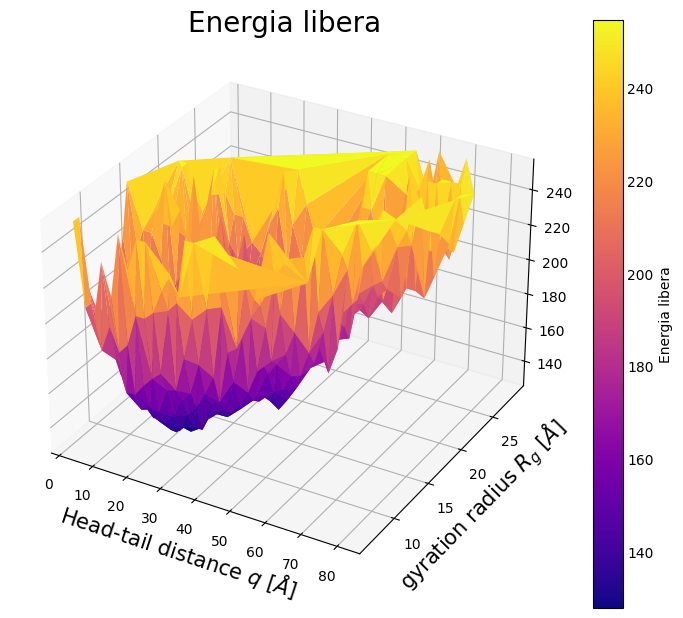

In [19]:
plt.style.use('_mpl-gallery')

data = np.loadtxt('confrontoMC_MD/2DbinningMC.dat') 
x, y, z = data[:, 0], data[:, 1], data[:, 2]

mask = z > 1e-8
x = x[mask]
y = y[mask]
z = -kB*T*np.log(z[mask])

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize = (7, 6))
ax.plot_trisurf(x, y, z, cmap='plasma')

ax.set_xlabel(r'Head-tail distance $q$ [$\AA$]', fontsize = 15)
ax.set_ylabel(r'gyration radius $R_g$ [$\AA$]', fontsize = 15)
ax.set_title(r"Energia libera", fontsize = 20)

sm = ScalarMappable(cmap='plasma')
sm.set_array(z)
plt.colorbar(sm, ax=ax, label='Energia libera')
plt.show()

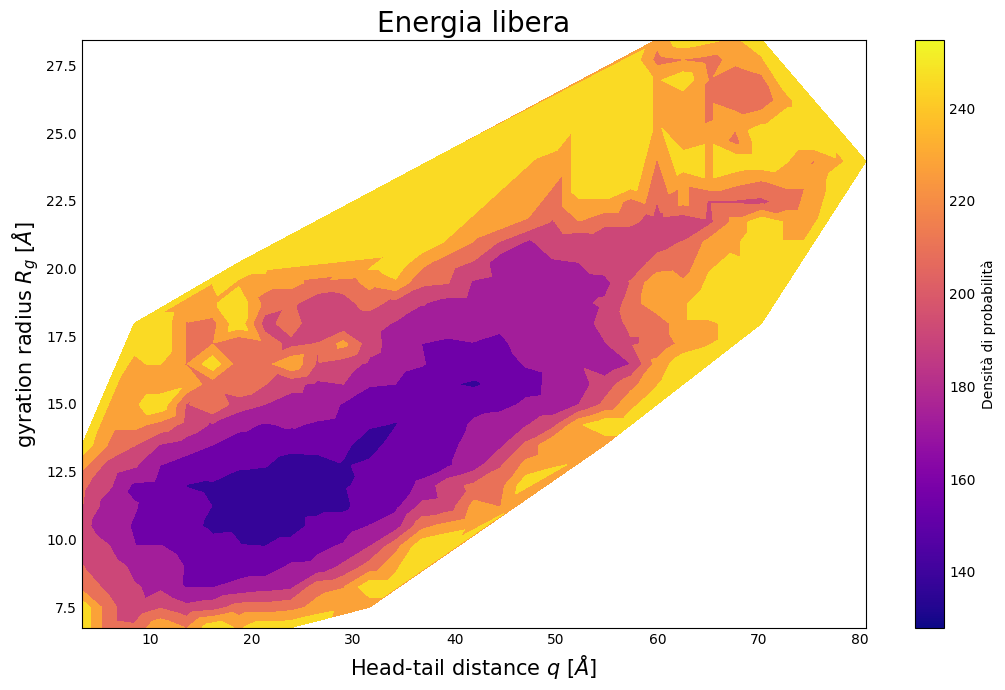

In [21]:
plt.style.use('_mpl-gallery-nogrid')

data = np.loadtxt('confrontoMC_MD/2DbinningMC.dat') 
x, y, z = data[:, 0], data[:, 1], data[:, 2]

mask = z > 1e-8
x = x[mask]
y = y[mask]
z = -kB*T*np.log(z[mask])

fig, ax = plt.subplots(figsize = (10, 6))
ax.tricontourf(x, y, z, cmap = 'plasma')
ax.set_xlabel(r'Head-tail distance $q$ [$\AA$]', fontsize = 15)
ax.set_ylabel(r'gyration radius $R_g$ [$\AA$]', fontsize = 15)
ax.set_title(r"Energia libera", fontsize = 20)

sm = ScalarMappable(cmap='plasma')
sm.set_array(z)
plt.colorbar(sm, ax=ax, label='Densità di probabilità')
plt.show()

Ci concentriamo ora sui singoli parametri d'ordine ed effettuiamo il vero e proprio confronto.

### Studio con raggio di girazione

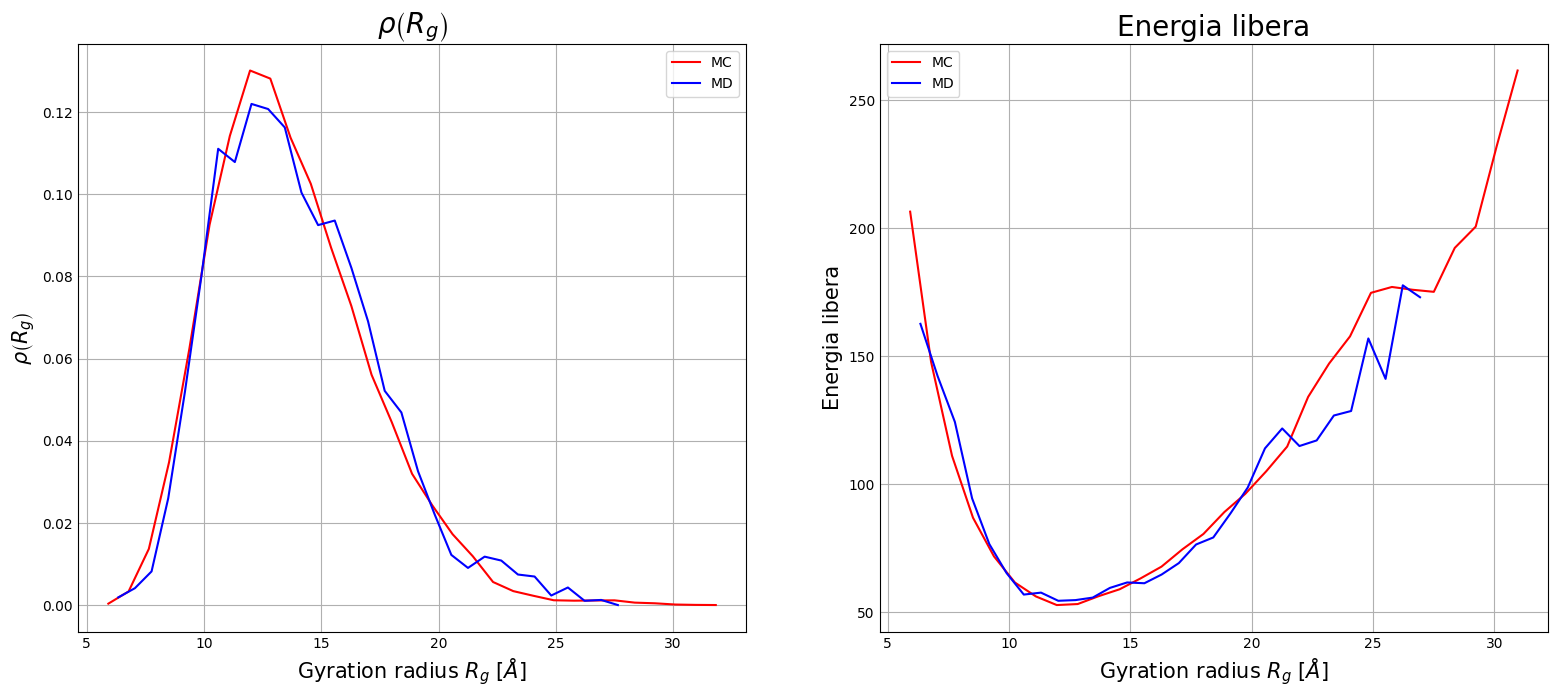

In [15]:
Rg_MC = np.loadtxt('confrontoMC_MD/proj_Rg/binningMC.dat')
Rg_MD = np.loadtxt('confrontoMC_MD/proj_Rg/1D_Rg_binning.dat')


xMC = Rg_MC[:, 0]; yMC = Rg_MC[:, 1]
mask = yMC > 1e-5; xMC = xMC[mask]; yMC = yMC[mask]; yMC = -kB * T * np.log(yMC)

xMD = Rg_MD[:, 0]; yMD = Rg_MD[:, 1]
mask = yMD > 1e-5; xMD = xMD[mask]; yMD = yMD[mask]; yMD = -kB * T * np.log(yMD)



fig = plt.figure(figsize=(15, 6))

# Grafico 1 -->  Probabilità
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(Rg_MC[:, 0], Rg_MC[:, 1], color = 'red',label = 'MC')
ax1.plot(Rg_MD[:, 0], Rg_MD[:, 1], color = 'blue',label = 'MD')

ax1.set_ylabel(r"$\rho\left(R_g\right)$", fontsize = 15)
ax1.set_xlabel(r"Gyration radius $R_g$ [$\AA$]", fontsize = 15)
ax1.set_title(r"$\rho\left(R_g\right)$", fontsize = 20)
ax1.legend(loc = 'best')
ax1.grid(True)


# Grafico 2 --> Energie libere
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(xMC, yMC, color = 'red', label = 'MC')
ax2.plot(xMD, yMD, color = 'blue', label = 'MD')

ax2.set_ylabel(r"Energia libera", fontsize = 15)
ax2.set_xlabel(r"Gyration radius $R_g$ [$\AA$]", fontsize = 15)
ax2.set_title(r"Energia libera", fontsize = 20)
ax2.legend(loc = 'best')
ax2.grid(True)

plt.show()

### Studio con head-tail distance

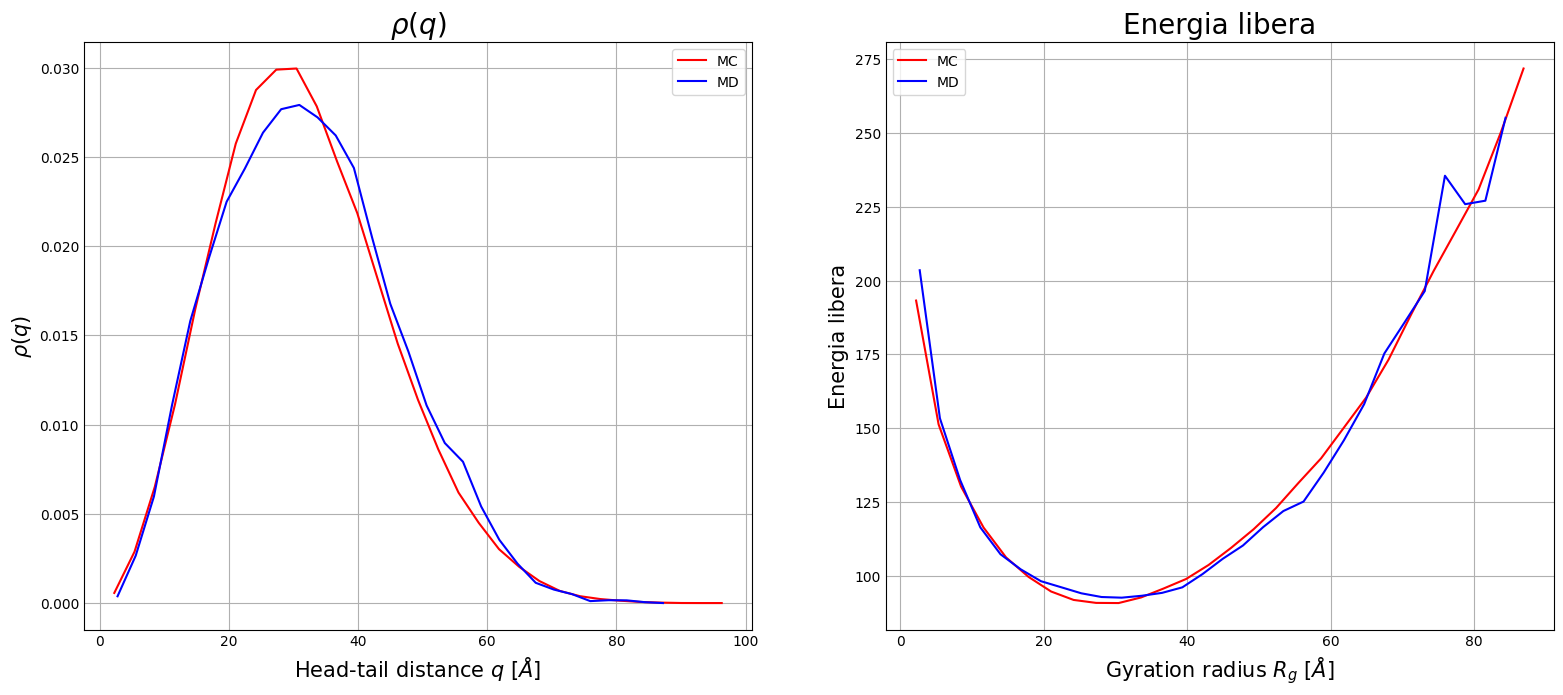

In [16]:
q_MC = np.loadtxt('confrontoMC_MD/proj_q/binningMC.dat')
q_MD = np.loadtxt('confrontoMC_MD/proj_q/1D_q_binning.dat')


xMC = q_MC[:, 0]; yMC = q_MC[:, 1]
mask = yMC > 1e-5; xMC = xMC[mask]; yMC = yMC[mask]; yMC = -kB * T * np.log(yMC)

xMD = q_MD[:, 0]; yMD = q_MD[:, 1]
mask = yMD > 1e-5; xMD = xMD[mask]; yMD = yMD[mask]; yMD = -kB * T * np.log(yMD)



fig = plt.figure(figsize=(15, 6))

# Grafico 1 -->  Probabilità
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(q_MC[:, 0], q_MC[:, 1], color = 'red',label = 'MC')
ax1.plot(q_MD[:, 0], q_MD[:, 1], color = 'blue',label = 'MD')

ax1.set_ylabel(r"$\rho\left(q\right)$", fontsize = 15)
ax1.set_xlabel(r"Head-tail distance $q$ [$\AA$]", fontsize = 15)
ax1.set_title(r"$\rho\left(q\right)$", fontsize = 20)
ax1.legend(loc = 'best')
ax1.grid(True)


# Grafico 2 --> Energie libere
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(xMC, yMC, color = 'red', label = 'MC')
ax2.plot(xMD, yMD, color = 'blue', label = 'MD')

ax2.set_ylabel(r"Energia libera", fontsize = 15)
ax2.set_xlabel(r"Gyration radius $R_g$ [$\AA$]", fontsize = 15)
ax2.set_title(r"Energia libera", fontsize = 20)
ax2.legend(loc = 'best')
ax2.grid(True)

plt.show()